In [1]:
import Optimizer as opt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
indep_var = np.random.normal(size = (100,2))
data = pd.DataFrame(data = indep_var, columns = ['indep_var1','indep_var2'])
data['dep_var'] = 2*data.indep_var1 + 3*data.indep_var2+np.random.normal(loc = 0, scale = 2, size=(len(data)))
data.head()

class MSE_Regression(opt.Model):
    def __init__(self, data):
        super().__init__(data)
    
    def predict(self, beta1, beta2):
        return self.data['indep_var1']*beta1 + self.data['indep_var2']*beta2
    
    def loss(self, beta1, beta2):
        prediction = self.predict(beta1, beta2)
        return np.sum((prediction-self.data['dep_var'])**2)

,indep_var1,indep_var2,dep_var
0,0.302895,-0.395487,-1.638678
1,-0.523455,-0.914831,-3.212326
2,0.951251,0.054076,-1.418446
3,0.855762,-1.600258,-4.679363
4,-1.568088,-0.231314,-0.213751


In [4]:
model = MSE_Regression(data)

r_all = opt.minimize_over_data(model, [10,10], 'Gradient Descend', 300, stochastic = False, lr = 1e-4)
r_all.x

r_stoch = opt.minimize_over_data(model, [10,10], 'Gradient Descend', 10, stochastic = True, lr = 1e-3)
r_stoch.x

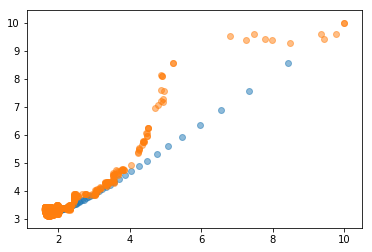

In [7]:
plt.scatter(np.array(r_all.val_rec)[:,0],np.array(r_all.val_rec)[:,1], alpha = .5)
plt.scatter(np.array(r_stoch.val_rec)[:,0],np.array(r_stoch.val_rec)[:,1], alpha = .5)